1: Importamos Librerías:

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
from cred_here_Template import YOUR_API_KEY #corresponde al token de la API de here que creé. Ojo, no es una librería, sino otro notebook
import requests #FUNDAMENTAL PARA HACER WEB SCRAPPING
from tqdm import tqdm  #es un pequeño módulo que permite crear una barra de progreso basada en texto,
from bs4 import BeautifulSoup #Es un módulo para hacer web scrapping
import json
import ast
import time 
#from utils import get_coord  #Este es el módulo donde están alojadas las funciones de geocode

2: Cargando base de datos

In [40]:
#Importamos el archivo
empresas_Buc = pd.read_csv('BASE_DE_DATOS_DE_EMPRESAS_CAMARA_DE_COMERCIO_DE_BUCARAMANGA_20240215.csv', parse_dates=['FECHA_MATRICULA'])

3: Análisis Exploratorio

3.1 Cantidad de registros:

In [41]:

registros = len(empresas_Buc)
print(f""" Hay un total de {registros} registros en el dataset""")

 Hay un total de 83506 registros en el dataset


3.2 Cantidad de variables:

In [42]:
variables = len(empresas_Buc.columns)
print(f""" Hay un total de {variables} columnas en el dataset""")

 Hay un total de 10 columnas en el dataset


3.3 Tipos de variables

In [43]:
empresas_Buc.info()
print('\n')
categoricas = []
numericas = []
for columna in empresas_Buc.columns:
    # Verificar si la columna es categórica y tiene más de 2 niveles
    if empresas_Buc[columna].dtype == 'object' and len(empresas_Buc[columna]) > 1:
        categoricas.append(columna)
    else:
      numericas.append(columna)

print(f""" Con respecto a los tipos de variables tenemos: \n
Hay {len(categoricas)} variables categoricas y son_ {categoricas} \n
Hay {len(numericas)} variables numericas y son: {numericas} """)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83506 entries, 0 to 83505
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NIT                  83487 non-null  object        
 1   RAZON_SOCIAL         83506 non-null  object        
 2   TIPO_JURIDICO        83506 non-null  object        
 3   ESTADO               83506 non-null  object        
 4   FECHA_MATRICULA      83506 non-null  datetime64[ns]
 5   DESC_CIIU1           83506 non-null  object        
 6   DIRECCION_COMERCIAL  83506 non-null  object        
 7   CIUDAD               83506 non-null  object        
 8   CORREO_ELECTRONICO   83505 non-null  object        
 9   TAMAÑO EMPRESA       83506 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.4+ MB


 Con respecto a los tipos de variables tenemos: 

Hay 9 variables categoricas y son_ ['NIT', 'RAZON_SOCIAL', 'TIPO_JURIDICO', 'ESTADO', 'DESC_CIIU

3.5 Verificación datos nulos.

In [44]:
registros_Nulos = empresas_Buc.isna().sum()
registros_Nulos

NIT                    19
RAZON_SOCIAL            0
TIPO_JURIDICO           0
ESTADO                  0
FECHA_MATRICULA         0
DESC_CIIU1              0
DIRECCION_COMERCIAL     0
CIUDAD                  0
CORREO_ELECTRONICO      1
TAMAÑO EMPRESA          0
dtype: int64

Nota: Observamos que en el campo 'NIT' hay algunos valores nulos: Visualicemos cuáles son:

In [45]:
empresas_Buc[empresas_Buc['NIT'].isna()]

,NIT,RAZON_SOCIAL,TIPO_JURIDICO,ESTADO,FECHA_MATRICULA,DESC_CIIU1,DIRECCION_COMERCIAL,CIUDAD,CORREO_ELECTRONICO,TAMAÑO EMPRESA
19114,NaN,HIDROLAVADOS.COM SAS,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2013-11-07,Limpieza General Interior De Edificios,CARRERA 15 # 6 - 21 LOCAL 10,Bucaramanga,roosembertl@gmail.com,MICROEMPRESA
72284,NaN,"""COMERCIALIZADORA FERRELOGISTICA S.A.S.""",SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-31,Comercio Al Por Menor De Artículos De Ferreter...,Calle 58 # 8 - 51,Giron,vagaskarina1215@gmail.com,MICROEMPRESA
73658,NaN,CALZADO S'MANTILLA S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-02-24,"Fabricación De Otros Tipos De Calzado, Excepto...",Calle 31 # 1 - 96 Barrio LA CUMBRE,Floridablanca,calzamantilla@gmail.com,MICROEMPRESA
74609,NaN,HORIZON TAX PROFESSIONALS S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-03-15,"Actividades De Contabilidad, Teneduría De Libr...",Carrera 48 # 30 - 21,Bucaramanga,horizontaxprofessionalsas@gmail.com,MICROEMPRESA
76590,NaN,MONTAÑEZ PINZÓN ABOGADOS SAS,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-04-21,Actividades Jurídicas,Calle 104D # 7 - 59,Bucaramanga,montanezpinzonabogados@gmail.com,MICROEMPRESA
76705,NaN,LA BELLECERA S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-04-25,Actividades De Producción De Películas Cinemat...,Calle 13N # 2A - 15 Apartamento 604 Conjunto ...,Piedecuesta,productorasenalsur@gmail.com,MICROEMPRESA
76778,NaN,SOFTWARE INTERESTELAR S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-04-26,Actividades De Desarrollo De Sistemas Informát...,Carrera 29 # 48 - 11,Bucaramanga,softwareinterestelar@gmail.com,MICROEMPRESA
77630,NaN,MARTHA OSORIO ESTUDIOS S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-05-16,Peluquería Y Otros Tratamientos De Belleza,Carrera 30A # 31 - 36,Bucaramanga,revivirbelleza@hotmail.com,MICROEMPRESA
78471,NaN,ECO-TECHNOLOGY AND INNOVATION FOR THE INDUSTRY...,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-06-06,Investigaciones Y Desarrollo Experimental En E...,Carrera 15 # 11 - 96,Bucaramanga,ecotechinnova@hotmail.com,MICROEMPRESA
78542,NaN,TOPOSCONSTRU JP SAS,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-06-07,Construcción De Edificios Residenciales,CRA 4 # 15N21 Casa,Bucaramanga,jhonnnn1788@gmail.com,MICROEMPRESA


A excepción de una de las empresas- cuyo valor del campo ESTADO == 'CANCELADO' todas las demás aparecen como 'ACTIVO'. Esto da a entender que la organización todavía está prestando y/o está en capacidad de ofrecer servicios

3.6 Verificación de registros duplicados:

Verificamos si existen registros duplicados. Para este caso, se usa la columna NIT, debido a que hace referencia al número de identificación de la empresa

In [46]:

duplicated = empresas_Buc[empresas_Buc.duplicated(keep='first', subset='NIT')] #Dataframe de registros duplicados
print(f""" Hay un total de {len(duplicated)} registros duplicados>""")

 Hay un total de 54 registros duplicados>


In [47]:
duplicated

,NIT,RAZON_SOCIAL,TIPO_JURIDICO,ESTADO,FECHA_MATRICULA,DESC_CIIU1,DIRECCION_COMERCIAL,CIUDAD,CORREO_ELECTRONICO,TAMAÑO EMPRESA
71001,0,GESTION DE PROPIEDAD HORIZONTAL CH SAS,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-06,Actividades Inmobiliarias Realizadas A Cambio ...,Avenida 87 # 24 - 09 Torre 2 Apartamento 703,Bucaramanga,grupopropiedadhorizontalch@gmail.com,MICROEMPRESA
71772,0,PREXON S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-23,Actividades De Desarrollo De Sistemas Informát...,Calle 197 # 15 - 425 Casa 23,Floridablanca,danieldavid2001@gmail.com,MICROEMPRESA
71780,0,INVERSIONES PRIETO FLOREZ S.A.S,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-23,Actividades De Administración Empresarial,Carrera 20 # 29 - 112 Casa 24 Conjunto RESIDE...,Floridablanca,gcomercialambientast@gmail.com,MICROEMPRESA
71936,0,TRANSPORTE Y LOGÍSTICA D&D S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-25,Transporte De Carga Por Carretera,Carrera 20 # 61 - 58,Floridablanca,transporteylogisticadydsas@hotmail.com,MICROEMPRESA
72039,0,LOS PEÑAS SABOR COSTEÑO S.A.S,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-26,"Comercio Al Por Menor De Leche, Productos Láct...",Carrera 16 # 45 - 138,Bucaramanga,analucia0280@hotmail.com,MICROEMPRESA
72088,0,SATA CONSTRUCCIONES S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-27,Comercio Al Por Menor De Artículos De Ferreter...,Calle 97 # 33 - 60,Bucaramanga,yaksonsuarez@hotmail.com,MICROEMPRESA
72284,NaN,"""COMERCIALIZADORA FERRELOGISTICA S.A.S.""",SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-01-31,Comercio Al Por Menor De Artículos De Ferreter...,Calle 58 # 8 - 51,Giron,vagaskarina1215@gmail.com,MICROEMPRESA
72574,0,CONSTRUCTORA E INMOBILIARIA H&Q S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-02-06,Construcción De Edificios Residenciales,Calle 52 # 23 - 42,Bucaramanga,paulasofia2017@outlook.es,MICROEMPRESA
73658,NaN,CALZADO S'MANTILLA S.A.S.,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-02-24,"Fabricación De Otros Tipos De Calzado, Excepto...",Calle 31 # 1 - 96 Barrio LA CUMBRE,Floridablanca,calzamantilla@gmail.com,MICROEMPRESA
73732,0,TRANSPORTE Y SERVICIOS METROPOLITANOS DE COLOM...,SOCIEDADES POR ACCIONES SIMPLIFICADAS SAS,ACTIVO,2023-02-27,Actividades De Mensajería,Calle 14 # 12 - 20 Barrio GAITAN,Bucaramanga,juandiego_pineda@hotmail.com,MICROEMPRESA


3.7 Borrado de columnas no apropiadas para modelamiento

Para esto debemos tener a consideración lo siguiente:

- Qué significa cada variable?
- El tipo de dato que representa es acorde a como Pandas lo detecta inicialmente?
- La presencia de null values es indicio de que debería ser eliminada?

In [48]:
empresas_Buc.tail(20)

,NIT,RAZON_SOCIAL,TIPO_JURIDICO,ESTADO,FECHA_MATRICULA,DESC_CIIU1,DIRECCION_COMERCIAL,CIUDAD,CORREO_ELECTRONICO,TAMAÑO EMPRESA
83486,63549216-0,ARIAS CRISTANCHO YOHANA PAOLA,PERSONA NATURAL,CANCELADO,2023-07-14,Comercio Al Por Menor En Establecimientos No E...,Calle 104H # 5A - 52 Barrio PORVENIR,Bucaramanga,pao_1484@hotmail.es,MICROEMPRESA
83487,1097488331-1,GOMEZ MORENO YEIMI ALEJANDRA,PERSONA NATURAL,CANCELADO,2023-07-17,Peluquería Y Otros Tratamientos De Belleza,Calle 56 # 32 - 80 Barrio CABECERA,Bucaramanga,alejagomez0229@gmail.com,MICROEMPRESA
83488,63475247-1,DIAZ ROMERO LUZ ELENA,PERSONA NATURAL,CANCELADO,2023-07-18,Expendio De Bebidas Alcohólicas Para El Consum...,Carrera 7 # 8 - 00 Barrio CENTRO,Piedecuesta,luhediro@gmail.com,MICROEMPRESA
83489,1095298859-5,RINCON AMAYA DARCY MAYLI,PERSONA NATURAL,CANCELADO,2023-07-19,Comercio Al Por Menor De Electrodomésticos Y G...,Calle 45 # 19 - 66,Bucaramanga,sillasamayala45@gmail.com,MICROEMPRESA
83490,1127345003-5,CRUZ PARRA JHON EUDEL,PERSONA NATURAL,CANCELADO,2023-07-19,Publicidad,Calle 100 # 33A - 14 Apartamento 101,Floridablanca,jhoncruzseo@gmail.com,MICROEMPRESA
83491,1062912967-7,HOYOS ARCE MAIRA LUCIA,PERSONA NATURAL,CANCELADO,2023-07-24,"Comercio De Partes, Piezas (Autopartes) Y Acce...",ANILLO VIAL Kilómetro 3 Vereda RIO FRIO Parque...,Giron,mairaluciahoyosarce@gmail.com,MICROEMPRESA
83492,77025456-3,LARROTA LIZARAZO EDUARDO,PERSONA NATURAL,CANCELADO,2023-07-25,Comercio Al Por Menor En Establecimientos No E...,Carrera 15 # 34 - 49 Local 101A Barrio,Bucaramanga,johan_2274@gmail.com,MICROEMPRESA
83493,1100951055-9,HERNANDEZ VELANDIA BETSSY JOHANA,PERSONA NATURAL,CANCELADO,2023-07-26,Comercio Al Por Menor De Otros Artículos Domés...,CL 29 B # 13 - 12 Barrio LA LIBERTAD,San Gil,betssyhv20@gmail.com,MICROEMPRESA
83494,1101694354-7,ALBA ACUÑA CARLOS ANDRES,PERSONA NATURAL,CANCELADO,2023-07-31,"Comercio Al Por Mayor De Desperdicios, Desecho...",Calle 11 # 20 - 76 Barrio COMUNEROS,Socorro,albaacunacarlosandres@gmail.com,MICROEMPRESA
83495,5685047-3,ECHEVERRI ROJAS JUAN JOSE,PERSONA NATURAL,CANCELADO,2023-08-01,Comercio Al Por Menor De Carnes (Incluye Aves ...,Carrera 15 PEATONAL 14B - 05 Barrio PUERTO M...,Giron,juanjoseecheverri2@gmail.com,MICROEMPRESA


3.8. Visualización empresas ACTIVAS Y canceladas

In [49]:
actividad = empresas_Buc.groupby(by=['ESTADO'],as_index=False).agg(EstaActiva=('ESTADO','count')).sort_values(by='EstaActiva',ascending=False)
actividad

,ESTADO,EstaActiva
0,ACTIVO,82877
9,EN REORGANIZACION,309
2,CANCELADO,223
4,EN DISOLUCION ANTICIPADA,43
7,EN LIQUIDACION JUDICIAL,18
5,EN DISOLUCION POR VIGENCIA,16
1,CAMBIO DE DOMICILIO,11
10,PERDIDA CALIDAD COMERCIANTE,4
3,DISOLUCION DECRETO 1068,3
6,EN LIQUIDACION,1


<AxesSubplot: xlabel='ESTADO', ylabel='EstaActiva'>

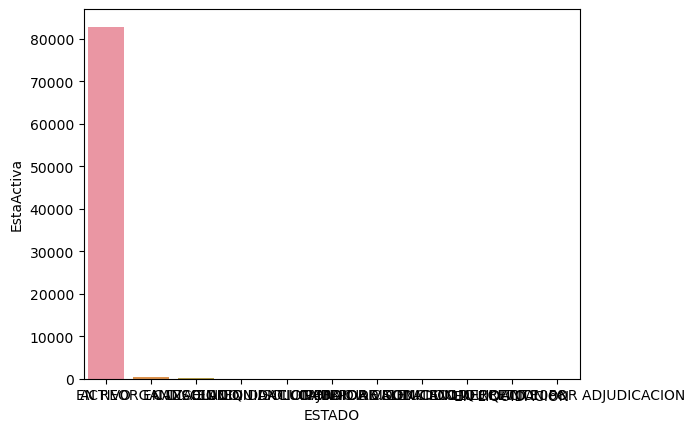

In [50]:
sns.barplot(data=actividad, x='ESTADO',y='EstaActiva')

GEOCODIFICACION:

Para este paso-posiblemente el más importante- vamos a usar la API de here para transformar los datos de dirección a coordenadas geográficas: LATITUD Y LONGITUD

In [51]:
empresas_Buc['DIRECCION_COMERCIAL'] = empresas_Buc['DIRECCION_COMERCIAL'].apply(lambda x : x.replace('#', 'No') )

In [52]:
empresas_Buc['DIREC_HERE'] =empresas_Buc.apply(lambda x: x['DIRECCION_COMERCIAL'] + ', ' + x['CIUDAD'].capitalize() + ', ' + 'Colombia', axis = 1 )
empresas_Buc.tail(5)

,NIT,RAZON_SOCIAL,TIPO_JURIDICO,ESTADO,FECHA_MATRICULA,DESC_CIIU1,DIRECCION_COMERCIAL,CIUDAD,CORREO_ELECTRONICO,TAMAÑO EMPRESA,DIREC_HERE
83501,1005449469-8,RINCÓN CAMARGO JUAN PABLO,PERSONA NATURAL,CANCELADO,2023-08-24,Actividades De Desarrollo De Sistemas Informát...,Carrera 7A No 6 - 12 Barrio MARIA ANTONIA,Rionegro,juanpablorincon123@gmail.com,MICROEMPRESA,"Carrera 7A No 6 - 12 Barrio MARIA ANTONIA, Ri..."
83502,4813917-2,MORENO CORREA MARCO ANTONIO,PERSONA NATURAL,CAMBIO DE DOMICILIO,2023-08-28,Silvicultura Y Otras Actividades Forestales,Carrera 3 No 4 - 28 Conjunto residencial FLOR...,Floridablanca,marmoco4813@gmail.com,MICROEMPRESA,Carrera 3 No 4 - 28 Conjunto residencial FLOR...
83503,1065812973-3,MAYORGA PASCO WILLIAM ANDRES,PERSONA NATURAL,CANCELADO,2023-08-31,Comercio Al Por Menor De Productos Farmacéutic...,Carrera 25 No 15 - 21,Bucaramanga,mayorga0412@hotmail.com,MICROEMPRESA,"Carrera 25 No 15 - 21, Bucaramanga, Colombia"
83504,88025703-8,VEGA TORRADO URIEL,PERSONA NATURAL,CANCELADO,2023-09-04,Cría De Ganado Bovino Y Bufalino,Calle 48 No 23 - 24 Edificio CATAR Apartament...,Bucaramanga,urielvt1979@icloud.com,MICROEMPRESA,Calle 48 No 23 - 24 Edificio CATAR Apartament...
83505,63493670-9,DAZA RIVERA YOLANDA,PERSONA NATURAL,CANCELADO,2023-09-04,Peluquería Y Otros Tratamientos De Belleza,Calle 33 Carrera 26-47,Bucaramanga,yolidazari@gmail.com,MICROEMPRESA,"Calle 33 Carrera 26-47, Bucaramanga, Colombia"


In [53]:
YOUR_API_KEY = YOUR_API_KEY

PROBEMOS QUE FUNCIONE LA GEOCODING API

In [54]:
camComercioExtra = empresas_Buc[['DIRECCION_COMERCIAL', 'RAZON_SOCIAL','DIREC_HERE']].drop_duplicates(subset='RAZON_SOCIAL', keep='first')
camComercioExtra

,DIRECCION_COMERCIAL,RAZON_SOCIAL,DIREC_HERE
0,CRA. 15 NO 18-77,MANUEL COBOS DUARTE LIMITADA,"CRA. 15 NO 18-77, Bucaramanga, Colombia"
1,CL. 22 NO 13-29,AFANADOR QUINTERO SAMUEL,"CL. 22 NO 13-29, Bucaramanga, Colombia"
2,CARRERA 3 No 8 - 42 BARRIO LA CANTERA,CARDENAS ANAYA EDILIA,"CARRERA 3 No 8 - 42 BARRIO LA CANTERA, Piedecu..."
3,CARRERA 15 No 4 - 12 BARRIO LAS DELICIAS,MEDINA ANAYA JAVIER,"CARRERA 15 No 4 - 12 BARRIO LAS DELICIAS, Pied..."
4,CRA. 5 NO. 3-85,PINTO FLOREZ MARIA DEL ROSARIO,"CRA. 5 NO. 3-85, Mogotes, Colombia"
...,...,...,...
83500,Transversal 29 No 104 - 106 Barrio ASTURIAS II,JAIMES GOMEZ RAFAEL AUGUSTO,Transversal 29 No 104 - 106 Barrio ASTURIAS I...
83502,Carrera 3 No 4 - 28 Conjunto residencial FLOR...,MORENO CORREA MARCO ANTONIO,Carrera 3 No 4 - 28 Conjunto residencial FLOR...
83503,Carrera 25 No 15 - 21,MAYORGA PASCO WILLIAM ANDRES,"Carrera 25 No 15 - 21, Bucaramanga, Colombia"
83504,Calle 48 No 23 - 24 Edificio CATAR Apartament...,VEGA TORRADO URIEL,Calle 48 No 23 - 24 Edificio CATAR Apartament...


In [55]:
#Ahora SÍ empieza lo bueno.
#Para mayor informacion consulta en: https://developer.here.com/documentation/geocoding-search-api/dev_guide/topics/quick-start.html
address = camComercioExtra['DIREC_HERE'][0] #Probamos con los primeros 10 registros
url = f'https://geocode.search.hereapi.com/v1/geocode?q={address}&apiKey={YOUR_API_KEY}'

#En address almacenamos el primer registro de nuestras direcciones
#luego reemplazamos ese primer registro en esa parte del enlace de la API KEY

#Ahora hacmeos la peticion
response = requests.get(url).json()

In [56]:
#Deberia retornarnos un json
response

{'items': [{'title': 'Carrera 15 18-77, 680011 Bucaramanga, Colombia',
   'id': 'here:af:streetsection:LeYpWOFrTPA-bIbNOsQ2CC:EAIaAjc3',
   'resultType': 'houseNumber',
   'houseNumberType': 'interpolated',
   'address': {'label': 'Carrera 15 18-77, 680011 Bucaramanga, Colombia',
    'countryCode': 'COL',
    'countryName': 'Colombia',
    'countyCode': 'ST',
    'county': 'Santander',
    'city': 'Bucaramanga',
    'district': 'San Francisco',
    'street': 'Carrera 15 18',
    'postalCode': '680011',
    'houseNumber': '77'},
   'position': {'lat': 7.12884, 'lng': -73.12963},
   'access': [{'lat': 7.12881, 'lng': -73.12976}],
   'mapView': {'west': -73.13054,
    'south': 7.12794,
    'east': -73.12872,
    'north': 7.12974},
   'scoring': {'queryScore': 0.92,
    'fieldScore': {'country': 1.0,
     'city': 1.0,
     'streets': [0.93],
     'houseNumber': 1.0}}},
  {'title': 'Carrera 7 15 N-18, 680001 Bucaramanga, Colombia',
   'id': 'here:af:streetsection:bUbHxrG8S1Jjhb-.M5YbkD:EAIa

Probamos la función que definimos en utils.py

In [ ]:
def get_coord (address, YOUR_API_KEY):
    url = f'https://geocode.search.hereapi.com/v1/geocode?q={address}&apiKey={YOUR_API_KEY}'
    
    try:
        response = requests.get(url).json() #Transformacion de la peticion a Json
        dirLimpia = response['items'][0]['title'].upper()#Indexing del json para extraer la direccion
        lat = response['items'][0]['position']['lat'] #Indexing del json para extraer la latitud
        lng = response['items'][0]['position']['lng'] #Indexing del json para extraer la longitud
        
        results = [dirLimpia, lat, lng] #Creamos una lista a partir de los valores d elas 3 variables
        
    except:
        results = ['Not Found', 'NA','NA']
        
    return results
        

In [57]:
get_coord(address, YOUR_API_KEY )

['Not Found', 'NA', 'NA']